In [ ]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
folder = '/content/drive/MyDrive/AI Report Photo/flowertrain/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('dandelion'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sunflower'):
    output = 4.0 
  if file.startswith('tulip'):
    output = 5.0
  photo = load_img(folder+file, target_size = (60,60))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(4317, 60, 60, 3) (4317,)


In [ ]:
# Save data 
save('/content/drive/MyDrive/Colaboratory/AI REPORT/Flowers/trainedModel/Flowers_photos.npy', photos)
save('/content/drive/MyDrive/Colaboratory/AI REPORT/Flowers/trainedModel/Flowers_labels.npy', labels)

In [ ]:
# Load data
photos = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/Flowers/trainedModel/Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/Flowers/trainedModel/Flowers_labels.npy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, random_state=3)

In [ ]:
X_train.shape

(3885, 60, 60, 3)

In [ ]:
y_train.shape

(3885,)

In [ ]:
X_test.shape

(432, 60, 60, 3)

In [ ]:
y_test.shape

(432,)

In [ ]:
# Standardized data
X_train = X_train.astype('float32')/255
y_train = to_categorical(y_train, 6) 

X_test = X_test.astype('float32')/255
y_test = to_categorical(y_test, 6)

In [ ]:
y_train.shape

(3885, 6)

In [ ]:
y_test.shape

(432, 6)

In [ ]:
# Import library
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, normalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(60, 60, 3), padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

In [ ]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(X_train, y_train, batch_size = 100, epochs = 45, verbose = 1)

Epoch 1/45
39/39 [==============================] - 1s 22ms/step - loss: 1.5398 - accuracy: 0.3459
Epoch 2/45
39/39 [==============================] - 1s 21ms/step - loss: 1.2458 - accuracy: 0.4721
Epoch 3/45
39/39 [==============================] - 1s 20ms/step - loss: 1.1225 - accuracy: 0.5385
Epoch 4/45
39/39 [==============================] - 1s 20ms/step - loss: 1.0623 - accuracy: 0.5833
Epoch 5/45
39/39 [==============================] - 1s 20ms/step - loss: 0.9743 - accuracy: 0.6224
Epoch 6/45
39/39 [==============================] - 1s 20ms/step - loss: 0.9261 - accuracy: 0.6396
Epoch 7/45
39/39 [==============================] - 1s 20ms/step - loss: 0.8731 - accuracy: 0.6610
Epoch 8/45
39/39 [==============================] - 1s 20ms/step - loss: 0.8324 - accuracy: 0.6782
Epoch 9/45
39/39 [==============================] - 1s 20ms/step - loss: 0.7758 - accuracy: 0.7037
Epoch 10/45
39/39 [==============================] - 1s 21ms/step - loss: 0.7385 - accuracy: 0.7241
Epoch 11/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save model
model.save('/content/drive/MyDrive/Colaboratory/AI REPORT/Flowers/Predict_5_flowers_Model.h5')

Test loss:  0.8583544492721558
Test accuracy 0.6712962985038757


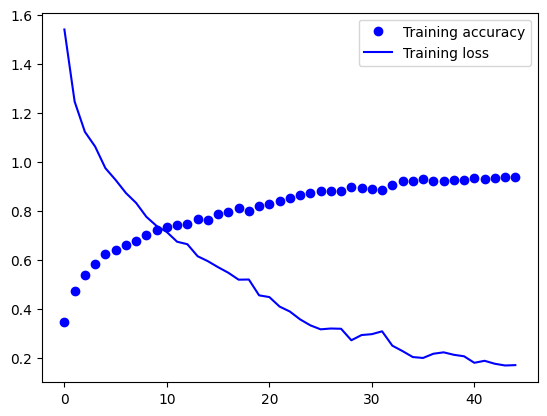

In [ ]:
test = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

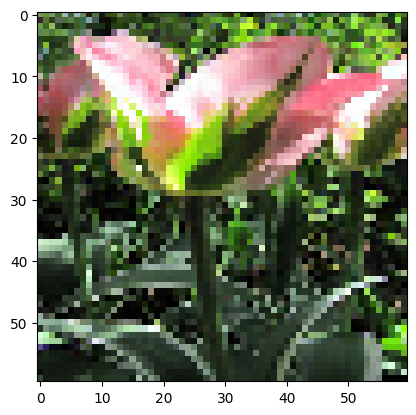

[0. 0. 0. 0. 0. 1.]


In [ ]:
# Use testmodel to evalute trainmodel

# Load photo in testmodel
img = X_test[123]
plt.imshow(img)
plt.show()
print(y_test[123])

In [ ]:
X_pred = X_test[123].reshape(1,60,60,3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 213ms/step


array([2])

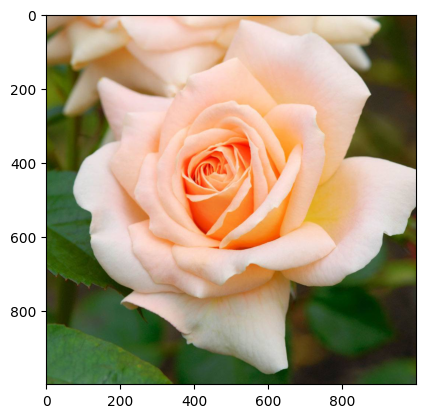

In [ ]:
# #IMPORT A PICTURE FOR MODEL PREDICT
url = '/content/1.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

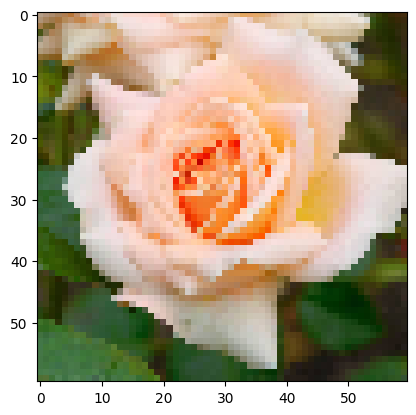

In [ ]:
img = load_img(url, target_size = (60,60,3))
plt.imshow(img)

In [ ]:
img = img_to_array(img)
img = img.reshape(1,60,60,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 133ms/step


array([3])